In [1]:
import sys
import warnings
warnings.filterwarnings(action='ignore')
import collections
from IPython.display import display
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

mpl.rcParams['axes.unicode_minus'] = False
font_fname = '/Users/seongdae/Library/Fonts/NanumGothicLight.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()

rc('font', family=font_name)
# size, family
print ('font size : '+str(plt.rcParams['font.size']) )
print ('font family : '+str(plt.rcParams['font.family']) )
# import default setting
print('python version : {0}\npandas version : {1}\nmatplotlib version : {2}\nnumpy version : {3}\n'
.format(sys.version, pd.__version__, mpl.__version__, np.__version__))

font size : 10.0
font family : ['NanumGothic']
python version : 3.7.6 (v3.7.6:43364a7ae0, Dec 18 2019, 14:18:50) 
[Clang 6.0 (clang-600.0.57)]
pandas version : 0.25.3
matplotlib version : 3.1.2
numpy version : 1.18.1



# Decision Tree

In [2]:
# 결정 트리는 분류와 회귀 문제에서 널리 사용하는 모델
# 기본적으로 결정 트리는 결정에 다다르기 위해 예/아니오 질문을 이어 나가면서 학습, like 스무고개

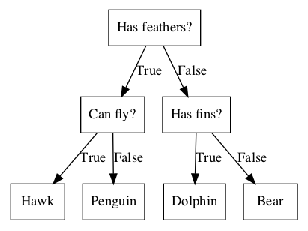

In [3]:
mglearn.plots.plot_animal_tree()

In [4]:
# 결정 트리를 학습한다는 것은, 정답에 가장 빨리 도달하는 예/아니오 질문 목록을 학습하는 것
    # 머신러닝에서는 이런 질문들을 테스트라고함
    # 보통의 데이터들은 연속된 특성으로 구성됨, 연속적인 데이터에 적용할 테스트는
        # "특성 i는 값 å 보다 큰가?" 와 같은 형태로 이루어짐
# 순수 노드 : 데이터를 분할할때, 각 분할된 영역 (결정 트리의 리프_말단_터미널)이 한개의 타깃값(하나의 클래스, 하나의 회귀 분석 결과)
# 를 가질때를 가질 때까지 반복함. 타깃 하나로만 이뤄진 리프노드를 순수 노드(pure node)라고 함

In [5]:
# 일반적으로 트리를 짤때, 모든 리프 노드가 순수 노드가 될 떄까지 진행하면 모델이 매우 복잡해지고 훈련데이터에 과적합됨
# 순수 노드로 이루어진 트리는 훈련 세트에 100% 정확하게 맞는다는 의미
    # 과적합시에 트리에 의한 결정 경계들이 클래스 포인트들에게서 멀리 떨어진 이상치(outlier)하나에 너무 민감해짐
# 과적합을 막는 두가지 전략
    # 1. 트리 생성을 일찍 중단, 사전 가지치기(pre-pruning)
        # 트리의 최대 깊이, 리프의 최대 개수를 제한 or 노드가 분할하기 위한 포인트의 최소 개수를 지정
    # 2. 트리를 만든 후, 데이터 포인트가 적은 노드를 삭제하거나 병합하는 전략, 사후 가지치기(post-pruning) or 그냥 가지치기(pruning)라함

In [6]:
# scikit-learn 에선 DecisionTreeRegressor/DecisionTreeClassifier 구현
# 사전 가지치기만 지원

In [7]:
#  결정 트리 분류기
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
print('훈련 세트 정확도 : {:.4f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.4f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 1.0000
테스트 세트 정확도 : 0.9371


In [8]:
# 예상했던 대로 사전 가지치기를 하지 않아서(==모든 리프노드가 순수노드), 훈련 세트 정확도는 1이나, 테스트 세트의 경우 선형 회귀보다 스코어가 낮음
# 개선을 위해서 매개변수를 줌
    # 트리 최대 깊이 제한 max_depth =4
tree_depth_pruning = DecisionTreeClassifier(random_state=0, max_depth=4).fit(X_train, y_train)
print('훈련 세트 정확도 : {:.4f}'.format(tree_depth_pruning.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.4f}'.format(tree_depth_pruning.score(X_test, y_test)))
# 훈련 스코어는 낮아졌지만, 테스트에서 예전보다 높은 스코어를 얻음 == 과대적합을 억제

훈련 세트 정확도 : 0.9883
테스트 세트 정확도 : 0.9510


## 결정 트리 분석(시각화)

In [9]:
# tree modul의 exprot_graphviz 함수 사용, 트리 시각화
    # 이 함수는 그래프 저장용 텍스트 파일 포맷 .dot 파일 만듬
    # 매개변수 filled = True < 노드의 클래스가 구분되도록 색으로 칠해짐
    # 시각화를 위해 클래스 이븜과 특성 이름을 매개변수로 전달
from sklearn.tree import export_graphviz
export_graphviz(tree_depth_pruning, out_file='./dot_files/decision_tree.dot', class_names=['악성', '양성'],
               feature_names=cancer.feature_names, impurity= False, filled=True)

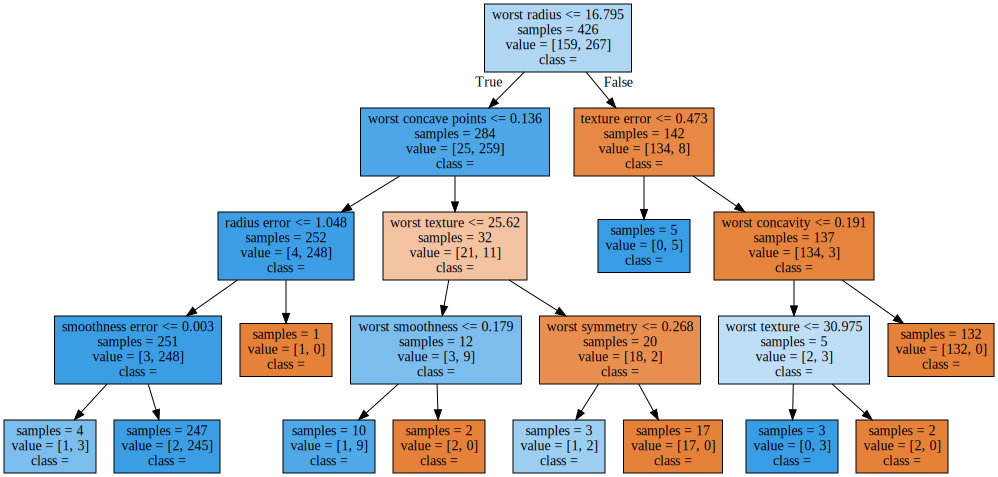

In [10]:
import graphviz

with open('./dot_files/decision_tree.dot', encoding='utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [11]:
# samples < 각 노드에 있는 샘플의 수를 나타냄
# value < 클래스당 샘플의 수

## 트리의 특성 중요도 살펴보기

특성 중요도 : 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


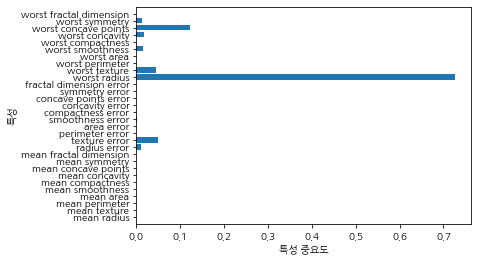

In [12]:
# 전체 트리를 한번에 보기 어려울 수 있음
# 어떻게 작동하는지 요약하는 속성을 사용할 수 있음
    # 트리를 만드는 결정에 각 특성이 얼마나 중요한지 평가하는 특성중요도(feature Importance)를 널리 사용함
    # 0 - 1 사이의 수로, 0에 가까울 수록 사용 빈도가 낮고, 1에 가까울 수록 높은 사용 빈도를 가짐
    # 각 특성마다 값을 가지며, 각 특성의 값을 전부 합치면 1이됨
print('특성 중요도 : \n', tree_depth_pruning.feature_importances_)
# 선형 모델의 계수를 시각화 하는것과 비슷하게, 특성 중요도도 시각화 할 수 있음

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1] # cancer.data.shape : 569, 30 각 특성의 갯수를 구하기 위해 .shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    # x 데이터가 카테고리 값인 경우에는 bar 명령과 barh 명령으로 바 차트(bar chart) 시각화를 할 수 있음.
    # 가로 방향으로 바 차트를 그리려면 barh 명령을 사용, np.arange(n) 0~ n-1 까지 정수(실수가능)순서대로 값... 0,1,2,3 ~ n-1
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('특성 중요도')
    plt.ylabel('특성')
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree_depth_pruning)

In [13]:
# 첫번째 노드에서 사용한 특성 'worst radius'이 가장 중요한 특성으로 나타나짐
    # == 첫번쨰 노드에서 두 클래스(양성/음성)를 꽤 잘 나누고 있다는것을 반증함
    # 그러나 어떤 특성의 feature_importance_ 값이 낮다고 해서 이 특성이 쓸모 없다고 할 수는 없음
    # 단지, 트리가 그 특성을 선택하지 않았을 뿐이며, 다른 특성이 동일한 정보를 지니고 있어서 일 수도 있음
# 선형 모델의 계수와 달리, 중요도는 항상 양수의 값을 가지며, 특성이 어떤 클래스를 지지하는지는 알 수 없음
    # 사실 특성과 클래스 사이에는 간단하지 않은 관계가 있을 수 있음
    # 값을 가지고 트리 형태로 나누지만, 그 내포된 의미는 그만큼 단순하지 않을 수 있다는 의미

In [14]:
# DecisionTreeRegression 또한 사용법과 분석법이 DecisionTreeClassifier와 비슷하지만
# 트리 회귀 모델들은 와삽(extrapolation), 즉 훈련 데이터의 범위 밖의 포인트에 대해서 예측 할수 없는 문제가 있음

## 외삽 대응 불가 (DecisionTreeRegression)

Text(0, 0.5, 'price ($/byte)')

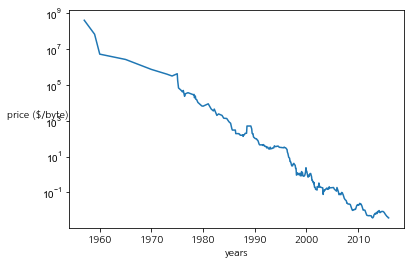

In [15]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))

plt.yticks(fontname = 'Arial')
plt.semilogy(ram_prices.date, ram_prices.price)
# y축 로그 스케일로 그림(그래프를 로그 스케일로 그리면 약간의 굴곡을 제외하고는 선형적으로 나타나짐)
plt.xlabel('years')
plt.ylabel('price ($/byte)',rotation =0)

In [16]:
# 2000년 전까지의 데이터만을 사용해서 그 이후 데이터를 예측하는 모델을 만들어보자
# LinearRegression, DecisionTreeRegression 비교
    # 가격을 로그 스케일로 바꾸었기 떄문에, 비교적 선형적 데이터 가짐
    # LinearRegression의 경우 큰 차이 발생(4장에서 다룸) -> 훈련 시키고 예측 수행후 다시 로그스케일 되돌리기 위해 지수(ext)함수 적용
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
data_train = ram_prices[ram_prices.date<2000]
data_test = ram_prices[ram_prices.date>=2000]
# 훈련, 테스트 날짜기준 분리

X_train = data_train.date[:, np.newaxis]
# 가격 예측 위해서 날짜 특성만 이용
y_train = np.log(data_train.price)
# 데이터와 타깃 사이의 관계를 좀 더 간단하게 하기 위해 로그 스케일로 바꿈

tree_reg = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]
# 전체 기간에 대해서 예측 수행

pred_tree = tree_reg.predict(X_all)
pred_lr = linear_reg.predict(X_all)
# 예측
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)
# 예측값 로그 스케일 -> 지수 함수 통해, 원래로 되돌림
    # 지수 로그 역함수


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


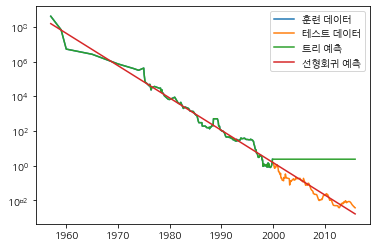

In [17]:
plt.semilogy(data_train.date, data_train.price, label = '훈련 데이터')
plt.semilogy(data_test.date, data_test.price, label = '테스트 데이터')
plt.semilogy(ram_prices.date, price_tree, label = '트리 예측')
plt.semilogy(ram_prices.date, price_lr, label = '선형회귀 예측')
plt.legend(loc='best')

In [18]:
# 훈련 데이터에 대해서 트리와 거의 완전히 겹치는 것을 볼 수 있지만, 2000년 이후의 데이터에 대해선 트리는 올바르게 예측하지 못함

# 정리

In [19]:
# 모델의 복잡도를 조절하는 매개변수는 사전 가지치기 매개변수를 가지고 있음
    # 가지치기의 비용함수(cost function)
    # 의사결정나무는 이 비용함수를 최소로 하는 분기를 찾아내도록 학습

    # CC(T)=Err(T)+α×L(T)

    # CC(T)=의사결정나무의 비용 복잡도(=오류가 적으면서 terminal node 수가 적은 단순한 모델일 수록 작은 값)
    # ERR(T)=검증데이터에 대한 오분류율
    # L(T)=terminal node의 수(구조의 복잡도)

    # Alpha=ERR(T)와 L(T)를 결합하는 가중치(사용자에 의해 부여됨, 보통 0.01~0.1의 값을 씀)
    
    # max_depth, max_leaf_nodes, min_samples_leaf 를 사용 할 수도 있음 (과적합 방지)
# 장점
# 시각화가 쉬움, 비전문가도 이해가 쉬움(비교적 작은 트리일 때)
# 데이터의 스케일에 구애 받지 않음
# 각 특성이 개별적으로 처리되어 데이터를 분할하는데, 데이터 스케일의 영향을 받지 않으므로, 결정 트리에서는 특성의 정규화나 표준화에 대한 전처리가 필요 없음
# 특성 간의 스케일이 다르거나, 이진 특성과 연속적 특성이 혼합되어 있어도 잘 작동함

# 단점
# 사전 가지치기를 사용하여도 과적합이 되는 경향이 있음, 일반화 성능 낮음
    # 극복하기 위해 앙상블 기법을 대안으로 사용

In [20]:
# 의사결정나무는 계산복잡성 대비 높은 예측 성능을 낼 수 있음, 또한 변수 단위로 설명력을 지닌다는 강점을 가짐
# 다만 의사결정나무는 결정경계(decision boundary)가 데이터 축에 수직이어서 특정 데이터에만 잘 작동할 가능성이 높음, 과적합 가능성 높고, 일반화 어려울 수도 있음
# 의사결정나무_회귀는 외삽(extrapolation)에 대한 예측은 할 수 없음
# 이같은 문제를 극복하기 위해 등장한 모델이 바로 랜덤포레스트, 같은 데이터에 대해 의사결정나무를 여러 개 만들어 그 결과를 종합해 예측 성능을 높이는 기법입니다.